# Naive Seasonal Analysis


## Data Cleaning
* Brand: Green Hero
* Type: Bestellung
* Marketplace: Amazon.de

In [80]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_style('darkgrid')

In [81]:
# importing csv files

df_2022_23 = pd.read_csv('/Users/judithrethmann/Documents/neuefische/Capstone/Part_2/data/raw/transactions_20220321_20230321.csv', usecols=['Datum/Uhrzeit', 'Typ', 'Bestellnummer', 'SKU', 'Beschreibung', 'Menge', 'Marketplace'])
df_2021_22 = pd.read_csv('/Users/judithrethmann/Documents/neuefische/Capstone/Part_2/data/raw/transactions_20210321_20220320.csv', usecols=['Datum/Uhrzeit', 'Typ', 'Bestellnummer', 'SKU', 'Beschreibung', 'Menge', 'Marketplace'])
df_2020_21 = pd.read_csv('/Users/judithrethmann/Documents/neuefische/Capstone/Part_2/data/raw/transactions_20200321_20210320.csv', usecols=['Datum/Uhrzeit', 'Typ', 'Bestellnummer', 'SKU', 'Beschreibung', 'Menge', 'Marketplace'])
df_2019_20 = pd.read_csv('/Users/judithrethmann/Documents/neuefische/Capstone/Part_2/data/raw/transactions_20190321_20200320.csv', usecols=['Datum/Uhrzeit', 'Typ', 'Bestellnummer', 'SKU', 'Beschreibung', 'Menge', 'Marketplace'])
df_2018_19 = pd.read_csv('/Users/judithrethmann/Documents/neuefische/Capstone/Part_2/data/raw/transactions_20180321_20190320.csv', usecols=['Datum/Uhrzeit', 'Typ', 'Bestellnummer', 'SKU', 'Beschreibung', 'Menge', 'Marketplace'])
df_2017_18 = pd.read_csv('/Users/judithrethmann/Documents/neuefische/Capstone/Part_2/data/raw/transactions_20170321_20180320.csv', usecols=['Datum/Uhrzeit', 'Typ', 'Bestellnummer', 'SKU', 'Beschreibung', 'Menge', 'Marketplace'])

In [82]:
# Create one dataframe for all years
list_df = [df_2022_23, df_2021_22, df_2020_21, df_2019_20, df_2018_19, df_2017_18]
df_2017_23_prelim = pd.concat(list_df)


In [83]:
# cleaning based on Brand, Marketplace, Typ

df_2017_23 = df_2017_23_prelim[(df_2017_23_prelim['Marketplace'].isin(['amazon.de'])) & (df_2017_23_prelim['Beschreibung'].str.contains('Green')) & (df_2017_23_prelim['Beschreibung'].str.contains('Hero')) & (df_2017_23_prelim['Typ'].isin(['Bestellung']))]
df_2017_23 = df_2017_23.rename(columns={'Datum/Uhrzeit': 'datum_uhrzeit', 'Typ': 'typ', 'Bestellnummer': 'bestellnummer', 'SKU': 'stock_keeping_unit', 'Beschreibung': 'beschreibung', 'Menge': 'menge', 'Marketplace': 'marketplace'})
df_2017_23['datum_uhrzeit']= pd.to_datetime(df_2017_23['datum_uhrzeit'], format= '%d.%m.%Y %H:%M:%S %Z')
len(df_2017_23.index)

281258

In [84]:
# match sku to product name
sku_tuples = [
    ('WI-MNQD-C5IN', 'Green Hero Ohrenwunder'),
    ('DH-Q025-PAAJ', 'Green Hero Floh- und Zeckenshampoo'),
    ('L7-1LMK-DJEI', 'Green Hero Haustierpflege'),
    ('L3-7ZMO-1CIH', 'Green Hero Imprägnierspray für Textilien und Leder'),
    ('SK-25X2-22FV', 'Green Hero Giardien-Ex'),
    ('DL-E9DB-MRJZ', 'Green Hero Geruchsentferner Spray'),
    ('X7-57C5-R8N8', 'Green Hero Knabber-EX'),
    ('AK-XWOU-UXK5', 'Green Hero Marder-Ex'),
    ('0J-3HRE-60X1', 'Green Hero Bronchial Liquid für Pferde'),
    ('L2-IF42-QXP2', 'Green Hero Floh und Zeckenspray'),
    ('GS-1JUX-47TW', 'Green Hero Mäuse-Ex'),
    ('7Q-PVFS-XT42', 'Green Hero Pfotenpflege'),
    ('YF-LSYF-48B0', 'Green Hero Nasen- und Schnauzenbalsam für Hunde'),
    ('V8-9TI9-LZ29', 'Green Hero Bremsen-EX Spray 500ml'),
    ('B7-TLGI-GQYB', 'Green Hero Kokosshampoo für Pferde'),
    ('JC-NT7B-888U', 'Green Hero Durchfalltabletten'),
    ('M3-WJSR-ALDD', 'Green Hero Premium Mariendistelöl'),
    ('78-XTZS-XNSR', 'Green Hero Trophäenbeize'),
    ('TJ-KT06-50HA', 'Green Hero Entfilzungs und Kämmhilfe'),
    ('YW-8NS1-EG0M', 'Green Hero Hufpflege'),
    ('CA-X3SD-TW37', 'Green Hero Lebertran-Zinksalbe'),
    ('GF-POQ4-88IK', 'Green Hero Frost-Spray'),
    ('ZU-C7ND-DVV4', 'Green Hero Trockenshampoo-Spray für Hunde'),
    ('GT-LGAH-WAFH', 'Green Hero Textil Waschimprägnierung'),
    ('8J-5KHF-4XQQ', 'Green Hero Lederseife'),
    ('VP-4YV1-BT0A', 'Green Hero Lederpflege'),
    ('LV-WFHC-S1GB', 'Green Hero Geruchsentferner und Fleckenentferner Konzentrat'),
    ('P6-FA8R-8GXR', 'Green Hero Pferdepflege'),
    ('CS-6S2Q-7DI1', 'Green Hero Entspannungsspray 500 ml'),
    ('AN-IOPS-6PXX', 'Green Hero Schimmelwunder 500ml'),
    ('X8-N2M3-1ZSI', 'Green Hero Premium Lachsöl'),
    ('5P-UQ8N-ZTBN', 'Green Hero Schweif- und Mähnenpflege'),
    ('ZF-99CL-SMVP', 'Green Hero Geruchsentferner und Fleckenentferner Spray'),
    ('EX-68IQ-CCTZ', 'Green Hero Vitamin B-Komplex'),
    ('YT-KSG0-6X3E', 'Green Hero Trophäenbleiche'),
    ('1H-VUHK-JZ6F', 'Green Hero Marderschreck'),
    ('NO-F870-8RPH', 'Green Hero DentaClean'),
    ('47-HAEP-HQIL', 'Green Hero Spinnen-Ex'),
    ('ZH-55LE-HR21', 'Green Hero Bettwanzen-Ex'),
    ('H2-ZPM5-PTT3', 'Green Hero Premium Schwarzkümmelöl'),
    ('W2-TK5X-USFP', 'Green Hero Trockenshampoo-Spray für Pferde'),
    ('OO-P8H1-BEDV', 'Green Hero Pferdedecken Imprägnierspray'),
    ('IY-TF0T-7P4B', 'Green Hero Pferdesalbe'),
    ('7Y-38VE-HJJM', 'Green Hero Zeckenspray'),
    ('1P-5B57-4FSJ', 'Green Hero Floh- und Zeckenshampoo FORTE'),
    ('B9-92YA-T1GO', 'Green Hero Mückenspray'),
    ('LE-O1T3-FZBV', 'Green Hero Nasen- und Nüsternbalsam für Pferde'),
    ('Y9-CR94-B2BX', 'Green Hero Backmatte 3er Set für Hundekekse'),
    ('5O-PQPH-S4YC', 'Green Hero Mückenspray'),
    ('JI-81R9-VAZ8', 'Green Hero Zeckenspray'),
    ('CH-13U4-AP63', 'Green Hero Gelenk Komplex'),
    ('N2-KU5F-0XN5', 'Green Hero Haustierpflege Shampoo für Hund und Katze'),
    ('QD-OXNG-25DG', 'Green Hero Haustierpflege 500ml'),
    ('TK-2OJ5-NU4M', 'Green Hero Hühner Vitamine'),
    ('Y7-TXJJ-0H2S', 'Green Hero Wurmkur'),
    ('98-3BW1-3HGU', 'Green Hero Bremsen-EX 5l'),
    ('LL-AQO2-LC19', 'Green Hero Milbenallergie-EX'),
    ('EN-4NX4-5BSQ', 'Green Hero Milben-EX'),
    ('CL-TTCJ-VM9X', 'Green Hero Zahnpflegespray'),
    ('3C-Q734-BXWH', 'Green Hero Haustierpflege 250ml'),
    ('Hirschgeweih Kausnack_M', 'Green Hero Hirschgeweih Kausnack Größe M'),
    ('Kaffeeholz_M', 'Green Hero Kaffeeholz Kaustab Größe M'),
    ('Hirschgeweih Kausnack_L', 'Green Hero Hirschgeweih Kausnack Größe L'),
    ('Kaffeeholz_S', 'Green Hero Kaffeeholz Kaustab Größe S'),
    ('Hirschgeweih Kausnack_S', 'Green Hero Hirschgeweih Kausnack Größe S'),
    ('07-SL2L-1I5N', 'Green Hero Knabber-EX Forte'),
    ('5T-F4BE-5LPJ', 'Green Hero Pferdesalbe'),
    ('R1-CIIH-A1T0', 'Green Hero Entspannungsspray 250 ml'),
    ('LB-ZNGA-IMHU', 'Green Hero Knabber-EX 250 ml'),
    ('GN-E8VT-38VN', 'Green Hero Backmatte 3er Set für Hundekekse'),
    ('66-YACE-OJ0H', 'Green Hero Haustierpflege 250ml'),
    ('Milben-EX-00', 'Green Hero Milben-EX'),
    ('AA-0F2K-IUOK', 'Green Hero Premium Dorschlebertran'),
    ('4I-CGMX-ECUW', 'Green Hero Premium Nachtkerzenöl'),
    ('QD-OXNG-25DD', 'Green Hero Haustierpflege'),
    ('BD-M6HR-PPQP', 'Green Hero Kunststoffreiniger'),
    ('ER-8SEC-5HCG', 'Green Hero Desinfektionsmittel für Oberflächen'),
    ('3L-ETDO-NCN3', 'Green Hero Desinfektionsmittel für Hände'),
    ('QN-9IID-HSWZ', 'Green Hero Desinfektionsmittel für Hände'),
    ('3N-VYXH-U52J', 'Green Hero Desinfektionsmittel für Oberflächen'),
    ('GM-DMML-99I6', 'Green Hero Silica-Spray'),
    ('BA-CY03-6IFT', 'Green Hero Schimmelwunder 500 ml'),
    ('O5-9VCX-Y6F3', 'Green Hero Schlupfwespen'),
    ('GI-B29M-Z752', 'Green Hero Silica-Spray'),
    ('RS-HNUS-RN1V', 'Green Hero Lagererzwespen'),
    ('IP-1TGB-231M', 'Green Hero Frost-Spray'),
    ('MU-4808-7I99', 'Green Hero Schimmelwunder 2l'),
    ('AY-03N9-925J', 'Green Hero 5% Tropfen aus Cannabis Sativa CBD'),
    ('FM-G2ZK-CJ7A', 'Green Hero Thermosflasche'),
    ('82-IISB-C35N', 'Green Hero Abflussreiniger'),
    ('SA-NX0B-NMQP', 'Green Hero Backofen- und Grillreiniger'),
    ('A1-F96K-T0XR', 'Green Hero Wohnmobilreiniger'),
    ('PQ-L5SE-1N5B', 'Green Hero Silberfisch-Ex'),
    ('NP-X4PG-LB5G', 'Green Hero Geruchsentferner'),
    ('IT-FYV5-8OPM', 'Green Hero Bio Kraftreiniger'),
    ('MW-4ZH8-G4O6', 'Green Hero Ameisen-Ex'),
    ('C9-D20Q-ECOX', 'Green Hero Knabber-Ex 500ml'),
    ('EN-UOP3-L4WU', 'Green Hero Käfer-Ex'),
    ('L9-5GL9-5090', 'Green Hero Feuerbällchen'),
    ('QM-D0AV-2W7N', 'Green Hero Milben-Ex'),
    ('F1-H99S-04H9', 'Green Hero Käfer-Ex')
    ]

sku_list = sorted(sku_tuples, key=lambda x: x[1])
sku_dict = dict(sku_list)

In [85]:
# add product name to df

df_2017_23.insert(5, 'produkt', df_2017_23['stock_keeping_unit'].map(sku_dict), True)
df_2017_23.head()

,datum_uhrzeit,typ,bestellnummer,stock_keeping_unit,beschreibung,produkt,menge,marketplace
0,2022-03-20 23:00:35+00:00,Bestellung,306-0439506-2145959,WI-MNQD-C5IN,Green Hero Ohrenwunder pflegt das Ohr und unte...,Green Hero Ohrenwunder,1.0,amazon.de
1,2022-03-20 23:05:49+00:00,Bestellung,306-7170044-3222732,DH-Q025-PAAJ,Green Hero Floh- und Zeckenshampoo für Hund & ...,Green Hero Floh- und Zeckenshampoo,1.0,amazon.de
2,2022-03-20 23:06:05+00:00,Bestellung,303-8346149-7601131,L7-1LMK-DJEI,Green Hero Haustierpflege Pflegt die Haut bei ...,Green Hero Haustierpflege,1.0,amazon.de
3,2022-03-20 23:11:13+00:00,Bestellung,306-8758401-0065934,L3-7ZMO-1CIH,Green Hero Imprägnierspray für Textilien und L...,Green Hero Imprägnierspray für Textilien und L...,1.0,amazon.de
4,2022-03-20 23:12:04+00:00,Bestellung,305-0925998-0962759,SK-25X2-22FV,Green Hero Giardien-Ex schu?tzt Haustiere wie ...,Green Hero Giardien-Ex,1.0,amazon.de


## Analysis

### by SKU

In [86]:
input =  'V8-9TI9-LZ29'

sku_df = df_2017_23[['datum_uhrzeit', 'stock_keeping_unit', 'produkt', 'menge']][df_2017_23.stock_keeping_unit == input]

In [87]:
ser_items_sold_weekly = sku_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='W')])['menge'].sum()
df_items_sold_weekly = ser_items_sold_weekly.reset_index()
df_items_sold_weekly.set_index('datum_uhrzeit',inplace=True)
df_items_sold_weekly.index=pd.to_datetime(df_items_sold_weekly.index)
df_items_sold_weekly

ser_items_sold_monthly = sku_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='M')])['menge'].sum()
df_items_sold_monthly = ser_items_sold_monthly.reset_index()
df_items_sold_monthly.set_index('datum_uhrzeit',inplace=True)
df_items_sold_monthly.index=pd.to_datetime(df_items_sold_monthly.index)
df_items_sold_monthly

,menge
datum_uhrzeit,
2018-04-30 00:00:00+00:00,4.0
2018-05-31 00:00:00+00:00,14.0
2018-06-30 00:00:00+00:00,41.0
2018-07-31 00:00:00+00:00,226.0
2018-08-31 00:00:00+00:00,307.0
2018-09-30 00:00:00+00:00,59.0
2018-10-31 00:00:00+00:00,15.0
2018-11-30 00:00:00+00:00,0.0
2018-12-31 00:00:00+00:00,2.0


<AxesSubplot: xlabel='datum_uhrzeit'>

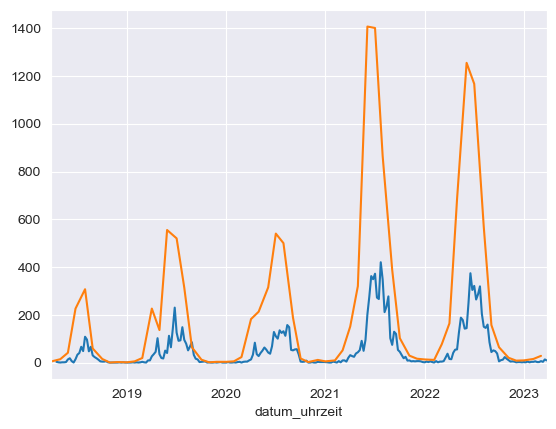

In [88]:
#df_items_sold_weekly.set_index('datum_uhrzeit',inplace=True)
#df_items_sold_weekly.index=pd.to_datetime(df_items_sold.index)
#drop null values
#df_items_sold_weekly.dropna(inplace=True)
ser_items_sold_weekly.plot()
ser_items_sold_monthly.plot()

<AxesSubplot: xlabel='datum_uhrzeit'>

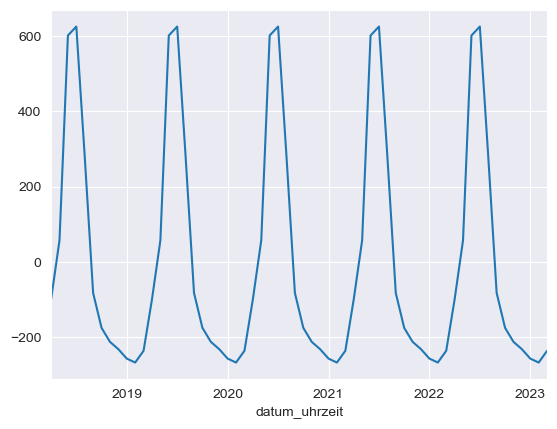

In [89]:
result=seasonal_decompose(df_items_sold_monthly['menge'], model='additive', period=12)
result.seasonal.plot()

### by product

In [90]:
input_produkt =  'Green Hero Schweif- und Mähnenpflege'

produkt_df = df_2017_23[['datum_uhrzeit', 'stock_keeping_unit', 'produkt', 'menge']][df_2017_23.produkt == input_produkt]

In [91]:
ser_items_sold_weekly = produkt_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='W')])['menge'].sum()
df_items_sold_weekly = ser_items_sold_weekly.reset_index()
df_items_sold_weekly.set_index('datum_uhrzeit',inplace=True)
df_items_sold_weekly.index=pd.to_datetime(df_items_sold_weekly.index)
df_items_sold_weekly

ser_items_sold_monthly = produkt_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='M')])['menge'].sum()
df_items_sold_monthly = ser_items_sold_monthly.reset_index()
df_items_sold_monthly.set_index('datum_uhrzeit',inplace=True)
df_items_sold_monthly.index=pd.to_datetime(df_items_sold_monthly.index)
df_items_sold_monthly

,menge
datum_uhrzeit,
2018-10-31 00:00:00+00:00,1.0
2018-11-30 00:00:00+00:00,0.0
2018-12-31 00:00:00+00:00,3.0
2019-01-31 00:00:00+00:00,25.0
2019-02-28 00:00:00+00:00,11.0
2019-03-31 00:00:00+00:00,9.0
2019-04-30 00:00:00+00:00,6.0
2019-05-31 00:00:00+00:00,28.0
2019-06-30 00:00:00+00:00,27.0


<AxesSubplot: xlabel='datum_uhrzeit'>

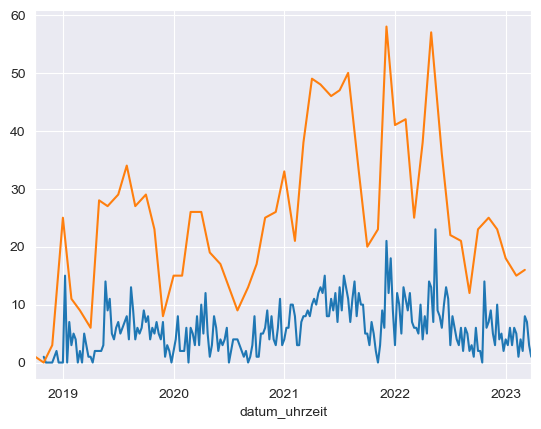

In [92]:
#df_items_sold_weekly.set_index('datum_uhrzeit',inplace=True)
#df_items_sold_weekly.index=pd.to_datetime(df_items_sold.index)
#drop null values
#df_items_sold_weekly.dropna(inplace=True)
ser_items_sold_weekly.plot()
ser_items_sold_monthly.plot()

<AxesSubplot: xlabel='datum_uhrzeit'>

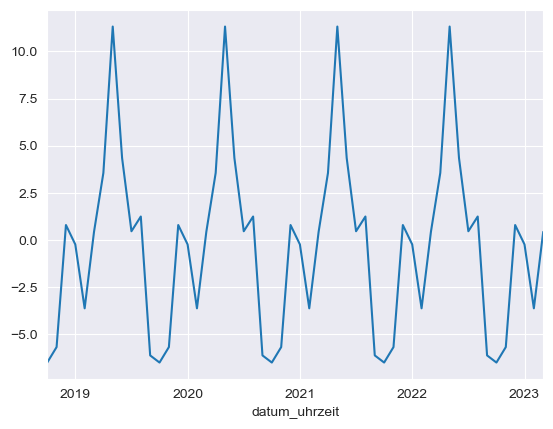

In [93]:
result=seasonal_decompose(df_items_sold_monthly['menge'], model='additive', period=12)
result.seasonal.plot()

# Forecasting

In [94]:
#import plotly.graph_objects as go

In [95]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_style('darkgrid')

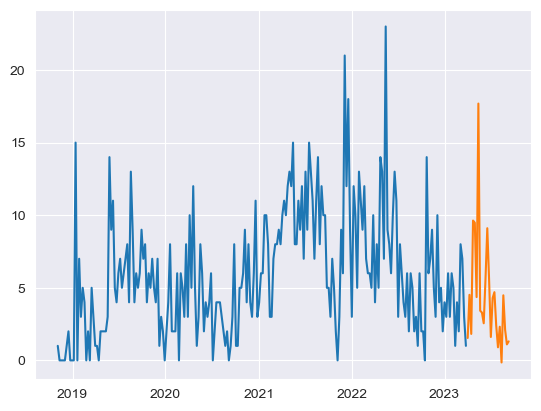

In [104]:
df_items_sold_weekly.index.freq = df_items_sold_weekly.index.inferred_freq
stlf = STLForecast(df_items_sold_weekly, ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
plt.plot(df_items_sold_weekly)
plt.plot(forecast)
plt.show()

In [97]:
import plotly.graph_objects as go
import pandas as pd

'''
#df_items_sold_monthly['Month'] = pd.to_datetime(df_items_sold_monthly['Month'])

train = df_items_sold_monthly.iloc[:-int(len(df_items_sold_monthly) * 0.2)]
test = df_items_sold_monthly.iloc[-int(len(df_items_sold_monthly) * 0.2):]

# Drift forecast
constant = (train['menge'].iloc[-1] - train['menge'].iloc[0])/(len(train)-1)
test['h'] = range(len(test))
test['drift_forecast'] = train['menge'].iloc[-1] + test['h']*constant

plt.plot(test['drift_forecast'], 'Drift Forecast')
'''



"\n#df_items_sold_monthly['Month'] = pd.to_datetime(df_items_sold_monthly['Month'])\n\ntrain = df_items_sold_monthly.iloc[:-int(len(df_items_sold_monthly) * 0.2)]\ntest = df_items_sold_monthly.iloc[-int(len(df_items_sold_monthly) * 0.2):]\n\n# Drift forecast\nconstant = (train['menge'].iloc[-1] - train['menge'].iloc[0])/(len(train)-1)\ntest['h'] = range(len(test))\ntest['drift_forecast'] = train['menge'].iloc[-1] + test['h']*constant\n\nplt.plot(test['drift_forecast'], 'Drift Forecast')\n"

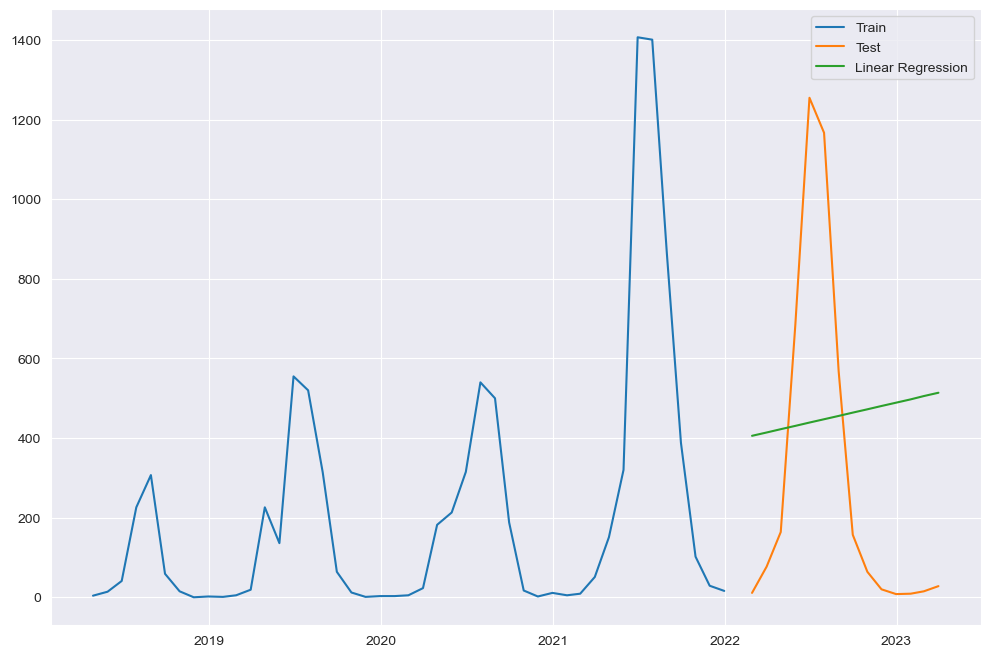

In [101]:
# linear regression

from sklearn.linear_model import LinearRegression
import pandas as pd

input_produkt =  'Green Hero Bremsen-EX Spray 500ml'

produkt_df = df_2017_23[['datum_uhrzeit', 'stock_keeping_unit', 'produkt', 'menge']][df_2017_23.produkt == input_produkt]

ser_items_sold_monthly = produkt_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='M')])['menge'].sum()
df_items_sold_monthly = ser_items_sold_monthly.reset_index(inplace=False)

n = len(df_items_sold_monthly)
train_count = round(n * 0.75)
train = df_items_sold_monthly.iloc[:train_count]
test = df_items_sold_monthly.iloc[train_count + 1:n]

lm = LinearRegression()
X = np.atleast_2d(train.index).T
y = np.atleast_2d(train.menge).T
lm.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)#, normalize=False)

y_hat_reg = test.copy().drop('menge', axis=1)
y_hat_reg['lin_forecast'] = lm.predict(np.atleast_2d(y_hat_reg.index).T)
plt.figure(figsize=(12,8))
plt.plot(train['datum_uhrzeit'], train['menge'], label='Train')
plt.plot(test['datum_uhrzeit'], test['menge'], label='Test')
plt.plot(y_hat_reg['datum_uhrzeit'], y_hat_reg['lin_forecast'], label='Linear Regression')
plt.legend(loc='best')
plt.show()

#type(train.index)
#display(train)

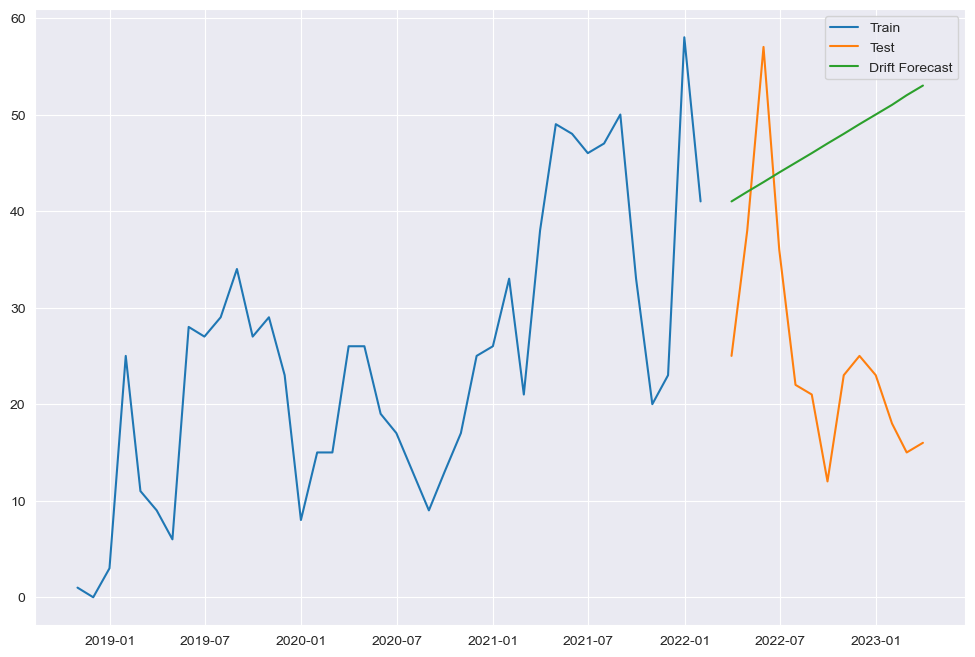

In [103]:
import pandas as pd

input_produkt =  'Green Hero Schweif- und Mähnenpflege'

produkt_df = df_2017_23[['datum_uhrzeit', 'stock_keeping_unit', 'produkt', 'menge']][df_2017_23.produkt == input_produkt]

ser_items_sold_monthly = produkt_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='M')])['menge'].sum()
df_items_sold_monthly = ser_items_sold_monthly.reset_index(inplace=False)

#df_items_sold_monthly = pd.DataFrame(ser_items_sold_monthly)

#df_items_sold_monthly = df_items_sold_monthly.rename(columns= {0: 'menge'})
#df_items_sold_monthly.index.name = 'datum_uhrzeit'

#'''
n = len(df_items_sold_monthly)
train_count = round(n * 0.75)
train = df_items_sold_monthly.iloc[:train_count]
test = df_items_sold_monthly.iloc[train_count + 1:n]

y_t = train.iloc[len(train)-1]['menge'] 
m = (y_t - train.iloc[0]['menge']) / len(train)
y_hat_drift = test.copy().drop('menge', axis=1)
h = np.linspace(0,len(y_hat_drift)-1, len(y_hat_drift))
y_hat_drift['drift_forecast'] = y_t + m * h
plt.figure(figsize=(12,8))
plt.plot(train['datum_uhrzeit'], train['menge'], label='Train')
plt.plot(test['datum_uhrzeit'], test['menge'], label='Test')
plt.plot(y_hat_drift['datum_uhrzeit'], y_hat_drift['drift_forecast'], 
        label='Drift Forecast')
plt.legend(loc='best')
plt.show()
#'''

#df_items_sold_monthly.info()
#display(df_items_sold_monthly)

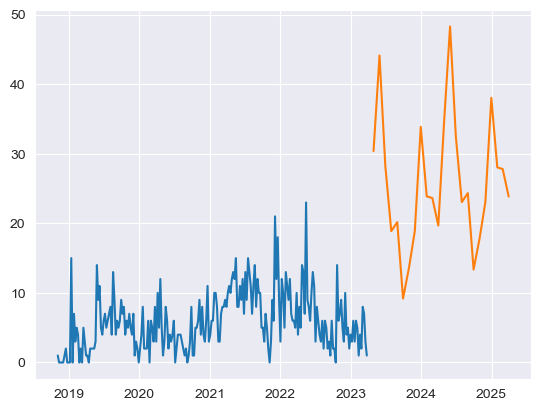

In [109]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

ser_items_sold_monthly = produkt_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='M')])['menge'].sum()
df_items_sold_monthly = ser_items_sold_monthly.reset_index()
df_items_sold_monthly.set_index('datum_uhrzeit',inplace=True)
df_items_sold_monthly.index=pd.to_datetime(df_items_sold_monthly.index)
df_items_sold_monthly

df_items_sold_monthly.index.freq = df_items_sold_monthly.index.inferred_freq
stlf = STLForecast(df_items_sold_monthly, ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
plt.plot(df_items_sold_weekly)
plt.plot(forecast)
plt.show()

In [128]:
import statsmodels.api as sm

input_produkt =  'Green Hero Bremsen-EX Spray 500ml'

produkt_df = df_2017_23[['datum_uhrzeit', 'stock_keeping_unit', 'produkt', 'menge']][df_2017_23.produkt == input_produkt]

ser_items_sold_monthly = produkt_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='M')])['menge'].sum()
df_items_sold_monthly = ser_items_sold_monthly.reset_index(inplace=False)

df_new = sm.add_constant(df_items_sold_monthly)
#display(df_new)

y = df_new['menge']
x = df_new['datum_uhrzeit']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x)
model.fit()

model.predict(df_new)
#x = sm.add_constant(X)

#model = sm.OLS(y, x).fit()

#print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const                        float64
datum_uhrzeit    datetime64[ns, UTC]
dtype: object. The data was
0        4.0
1       14.0
2       41.0
3      226.0
4      307.0
5       59.0
6       15.0
7        0.0
8        2.0
9        1.0
10       5.0
11      19.0
12     226.0
13     136.0
14     555.0
15     520.0
16     314.0
17      64.0
18      12.0
19       1.0
20       3.0
21       3.0
22       5.0
23      23.0
24     182.0
25     213.0
26     315.0
27     540.0
28     500.0
29     188.0
30      17.0
31       2.0
32      11.0
33       5.0
34       9.0
35      51.0
36     151.0
37     320.0
38    1407.0
39    1401.0
40     865.0
41     388.0
42     102.0
43      29.0
44      16.0
45      13.0
46      11.0
47      77.0
48     164.0
49     685.0
50    1255.0
51    1167.0
52     568.0
53     157.0
54      64.0
55      20.0
56       8.0
57       9.0
58      15.0
59      28.0
Name: menge, dtype: float64
and
     const             datum_uhrzeit
0     1.0 2018-04-30 00:00:00+00:00
1     1.0 2018-05-31 00:00:00+00:00
2     1.0 2018-06-30 00:00:00+00:00
3     1.0 2018-07-31 00:00:00+00:00
4     1.0 2018-08-31 00:00:00+00:00
5     1.0 2018-09-30 00:00:00+00:00
6     1.0 2018-10-31 00:00:00+00:00
7     1.0 2018-11-30 00:00:00+00:00
8     1.0 2018-12-31 00:00:00+00:00
9     1.0 2019-01-31 00:00:00+00:00
10    1.0 2019-02-28 00:00:00+00:00
11    1.0 2019-03-31 00:00:00+00:00
12    1.0 2019-04-30 00:00:00+00:00
13    1.0 2019-05-31 00:00:00+00:00
14    1.0 2019-06-30 00:00:00+00:00
15    1.0 2019-07-31 00:00:00+00:00
16    1.0 2019-08-31 00:00:00+00:00
17    1.0 2019-09-30 00:00:00+00:00
18    1.0 2019-10-31 00:00:00+00:00
19    1.0 2019-11-30 00:00:00+00:00
20    1.0 2019-12-31 00:00:00+00:00
21    1.0 2020-01-31 00:00:00+00:00
22    1.0 2020-02-29 00:00:00+00:00
23    1.0 2020-03-31 00:00:00+00:00
24    1.0 2020-04-30 00:00:00+00:00
25    1.0 2020-05-31 00:00:00+00:00
26    1.0 2020-06-30 00:00:00+00:00
27    1.0 2020-07-31 00:00:00+00:00
28    1.0 2020-08-31 00:00:00+00:00
29    1.0 2020-09-30 00:00:00+00:00
30    1.0 2020-10-31 00:00:00+00:00
31    1.0 2020-11-30 00:00:00+00:00
32    1.0 2020-12-31 00:00:00+00:00
33    1.0 2021-01-31 00:00:00+00:00
34    1.0 2021-02-28 00:00:00+00:00
35    1.0 2021-03-31 00:00:00+00:00
36    1.0 2021-04-30 00:00:00+00:00
37    1.0 2021-05-31 00:00:00+00:00
38    1.0 2021-06-30 00:00:00+00:00
39    1.0 2021-07-31 00:00:00+00:00
40    1.0 2021-08-31 00:00:00+00:00
41    1.0 2021-09-30 00:00:00+00:00
42    1.0 2021-10-31 00:00:00+00:00
43    1.0 2021-11-30 00:00:00+00:00
44    1.0 2021-12-31 00:00:00+00:00
45    1.0 2022-01-31 00:00:00+00:00
46    1.0 2022-02-28 00:00:00+00:00
47    1.0 2022-03-31 00:00:00+00:00
48    1.0 2022-04-30 00:00:00+00:00
49    1.0 2022-05-31 00:00:00+00:00
50    1.0 2022-06-30 00:00:00+00:00
51    1.0 2022-07-31 00:00:00+00:00
52    1.0 2022-08-31 00:00:00+00:00
53    1.0 2022-09-30 00:00:00+00:00
54    1.0 2022-10-31 00:00:00+00:00
55    1.0 2022-11-30 00:00:00+00:00
56    1.0 2022-12-31 00:00:00+00:00
57    1.0 2023-01-31 00:00:00+00:00
58    1.0 2023-02-28 00:00:00+00:00
59    1.0 2023-03-31 00:00:00+00:00
before. After,
[4.000e+00 1.400e+01 4.100e+01 2.260e+02 3.070e+02 5.900e+01 1.500e+01
 0.000e+00 2.000e+00 1.000e+00 5.000e+00 1.900e+01 2.260e+02 1.360e+02
 5.550e+02 5.200e+02 3.140e+02 6.400e+01 1.200e+01 1.000e+00 3.000e+00
 3.000e+00 5.000e+00 2.300e+01 1.820e+02 2.130e+02 3.150e+02 5.400e+02
 5.000e+02 1.880e+02 1.700e+01 2.000e+00 1.100e+01 5.000e+00 9.000e+00
 5.100e+01 1.510e+02 3.200e+02 1.407e+03 1.401e+03 8.650e+02 3.880e+02
 1.020e+02 2.900e+01 1.600e+01 1.300e+01 1.100e+01 7.700e+01 1.640e+02
 6.850e+02 1.255e+03 1.167e+03 5.680e+02 1.570e+02 6.400e+01 2.000e+01
 8.000e+00 9.000e+00 1.500e+01 2.800e+01]
[[1.0 Timestamp('2018-04-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2018-05-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2018-06-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2018-07-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2018-08-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2018-09-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2018-10-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2018-11-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2018-12-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2019-01-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2019-02-28 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2019-03-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2019-04-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2019-05-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2019-06-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2019-07-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2019-08-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2019-09-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2019-10-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2019-11-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2019-12-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2020-01-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2020-02-29 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2020-03-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2020-04-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2020-05-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2020-06-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2020-07-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2020-08-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2020-09-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2020-10-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2020-11-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2020-12-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2021-01-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2021-02-28 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2021-03-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2021-04-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2021-05-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2021-06-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2021-07-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2021-08-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2021-09-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2021-10-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2021-11-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2021-12-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2022-01-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2022-02-28 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2022-03-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2022-04-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2022-05-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2022-06-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2022-07-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2022-08-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2022-09-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2022-10-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2022-11-30 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2022-12-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2023-01-31 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2023-02-28 00:00:00+0000', tz='UTC')]
 [1.0 Timestamp('2023-03-31 00:00:00+0000', tz='UTC')]].

In [160]:
import statsmodels
from statsmodels.tsa.forecasting.theta import ThetaModel
import pandas as pd
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_style('darkgrid')

input_produkt =  'Green Hero Bremsen-EX Spray 500ml'

produkt_df = df_2017_23[['datum_uhrzeit', 'stock_keeping_unit', 'produkt', 'menge']][df_2017_23.produkt == input_produkt]

#ser_items_sold_monthly = produkt_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='M')])['menge'].sum()
#df_items_sold_monthly = ser_items_sold_monthly.reset_index(inplace=False)

ser_items_sold_monthly = sku_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='M')])['menge'].sum()
df_items_sold_monthly = ser_items_sold_monthly.reset_index()
df_items_sold_monthly.set_index('datum_uhrzeit',inplace=True)
df_items_sold_monthly.index=pd.to_datetime(df_items_sold_monthly.index)
df_items_sold_monthly

#df_items_sold_monthly['monat'] = df_items_sold_monthly['datum_uhrzeit'].apply(lambda x: x.strftime('%B-%Y')) 
#df_items_sold_monthly = df_items_sold_monthly[[index, 'menge']]

df_items_sold_monthly = df_items_sold_monthly.astype({'menge':'int'})
#df_items_sold_monthly = df_items_sold_monthly.astype({'datum_uhrzeit':'int'})

df_items_sold_monthly.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-04-30 00:00:00+00:00 to 2023-03-31 00:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   menge   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 2025-03-31 00:00:00
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   datum_uhrzeit     60 non-null     datetime64[ns, UTC]
 1   menge             60 non-null     float64            
 2   forecasted_sales  0 non-null      object             
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 2.6+ KB


,datum_uhrzeit,menge,forecasted_sales
0,2018-04-30 00:00:00+00:00,4.0,NaN
1,2018-05-31 00:00:00+00:00,14.0,NaN
2,2018-06-30 00:00:00+00:00,41.0,NaN
3,2018-07-31 00:00:00+00:00,226.0,NaN
4,2018-08-31 00:00:00+00:00,307.0,NaN
...,...,...,...
2024-06-30 00:00:00,NaT,NaN,NaN
2024-07-31 00:00:00,NaT,NaN,NaN
2024-08-31 00:00:00,NaT,NaN,NaN
2024-09-30 00:00:00,NaT,NaN,NaN


TypeError: float() argument must be a string or a number, not 'Timestamp'

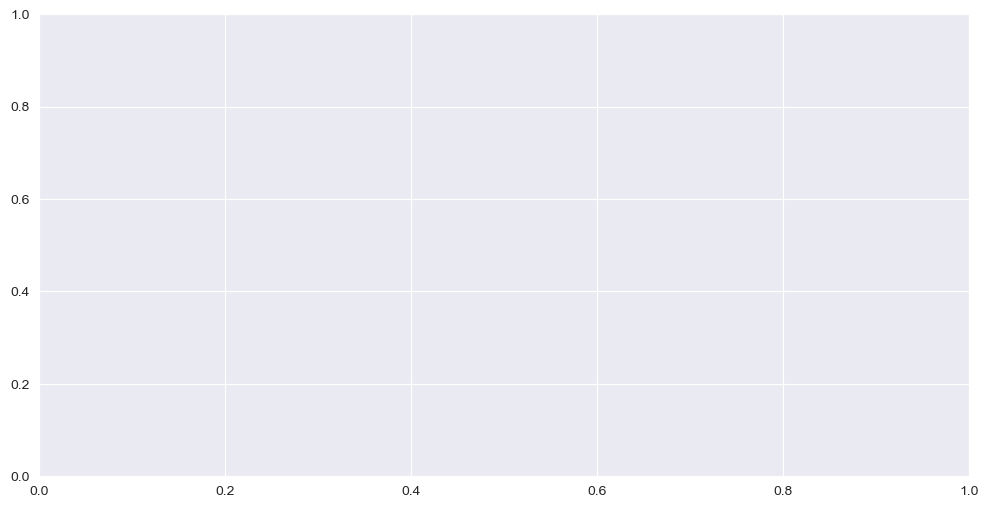

In [179]:
from statsmodels.tsa.forecasting.theta import ThetaModel

df_items_sold_monthly.index.freq = 'M'
#df_items_sold_monthly = df_items_sold_monthly.reset_index()

# create the Theta Model object
model = ThetaModel(df_items_sold_monthly['menge'])

# fit the model to the data
model_fit = model.fit()

# use the model to forecast the next 24 months (2 years)
forecast = model_fit.forecast(steps=24)

# print the forecasted sales
#print(forecast)



# create a range of dates for the forecast period
forecast_index = pd.date_range(start='2023-04-30', periods=24, freq='M')

# create a new dataframe with the forecasted sales
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['forecasted_sales'])

# combine the original dataframe with the forecasted dataframe
combined_df = pd.concat([df_items_sold_monthly, forecast_df])

# plot the combined dataframe
combined_df.info()
display(combined_df.head(-5))
#'''
plt.figure(figsize=(12,6))
plt.plot(combined_df.index, combined_df['menge'], label='actual sales')
plt.plot(combined_df.index, combined_df['forecasted_sales'], label='forecasted sales')
plt.legend(loc='upper left')
plt.show()
#'''

In [166]:
input_produkt =  'Produkt Name'

produkt_df = df_2017_23[['datum_uhrzeit', 'stock_keeping_unit', 'produkt', 'menge']][df_2017_23.produkt == input_produkt]
produkt_df['datum_uhrzeit']= pd.to_datetime(produkt_df['datum_uhrzeit'], format= '%d.%m.%Y %H:%M:%S %Z')

display(produkt_df.head())
produkt_df.info()

,datum_uhrzeit,stock_keeping_unit,produkt,menge


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   datum_uhrzeit       0 non-null      datetime64[ns, UTC]
 1   stock_keeping_unit  0 non-null      object             
 2   produkt             0 non-null      object             
 3   menge               0 non-null      float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 0.0+ bytes


/opt/homebrew/Caskroom/miniconda/base/envs/nf_capstone/lib/python3.9/site-packages/statsmodels/tsa/forecasting/theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)


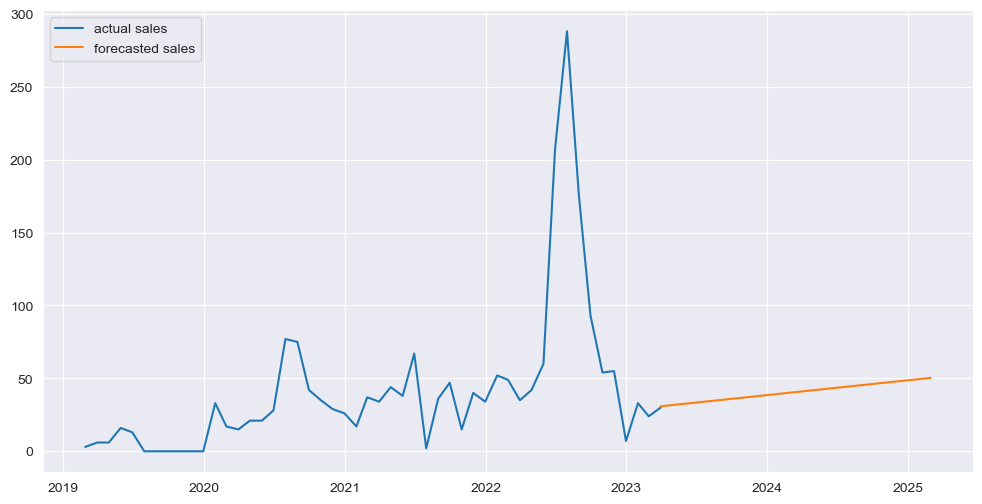

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.forecasting.theta import ThetaModel

input_produkt =  'Green Hero Frost-Spray'

produkt_df = df_2017_23[['datum_uhrzeit', 'stock_keeping_unit', 'produkt', 'menge']][df_2017_23.produkt == input_produkt]
produkt_df['datum_uhrzeit']= pd.to_datetime(produkt_df['datum_uhrzeit'], format= '%d.%m.%Y %H:%M:%S %Z')

ser_items_sold_monthly = produkt_df.groupby([pd.Grouper(key='datum_uhrzeit', freq='M')])['menge'].sum()
df_items_sold_monthly = ser_items_sold_monthly.reset_index()
df_items_sold_monthly.set_index('datum_uhrzeit',inplace=True)
df_items_sold_monthly.index=pd.to_datetime(df_items_sold_monthly.index, format= '%d.%m.%Y %H:%M:%S %Z')

df_items_sold_monthly

model = ThetaModel(df_items_sold_monthly['menge'], deseasonalize = True, period = 12, method = 'multiplicative')

model_fit = model.fit()

forecast_values = model_fit.forecast(steps=24)

df_items_sold_monthly = df_items_sold_monthly.reset_index(inplace=False)
forecast_values = forecast_values.reset_index()
forecast_values.set_index('index',inplace=True)
forecast_values.insert(0, 'datum_uhrzeit', pd.date_range(start=df_items_sold_monthly['datum_uhrzeit'].max(), periods=24, freq='M'))

plt.figure(figsize=(12,6))
plt.plot(df_items_sold_monthly['datum_uhrzeit'], df_items_sold_monthly['menge'], label='actual sales')
plt.plot(forecast_values['datum_uhrzeit'], forecast_values['forecast'], label='forecasted sales')
plt.legend(loc='upper left')
plt.show()




In [272]:
sku_dict

{'AY-03N9-925J': 'Green Hero 5% Tropfen aus Cannabis Sativa CBD',
 '82-IISB-C35N': 'Green Hero Abflussreiniger',
 'MW-4ZH8-G4O6': 'Green Hero Ameisen-Ex',
 'Y9-CR94-B2BX': 'Green Hero Backmatte 3er Set für Hundekekse',
 'GN-E8VT-38VN': 'Green Hero Backmatte 3er Set für Hundekekse',
 'SA-NX0B-NMQP': 'Green Hero Backofen- und Grillreiniger',
 'ZH-55LE-HR21': 'Green Hero Bettwanzen-Ex',
 'IT-FYV5-8OPM': 'Green Hero Bio Kraftreiniger',
 '98-3BW1-3HGU': 'Green Hero Bremsen-EX 5l',
 'V8-9TI9-LZ29': 'Green Hero Bremsen-EX Spray 500ml',
 '0J-3HRE-60X1': 'Green Hero Bronchial Liquid für Pferde',
 'NO-F870-8RPH': 'Green Hero DentaClean',
 '3L-ETDO-NCN3': 'Green Hero Desinfektionsmittel für Hände',
 'QN-9IID-HSWZ': 'Green Hero Desinfektionsmittel für Hände',
 'ER-8SEC-5HCG': 'Green Hero Desinfektionsmittel für Oberflächen',
 '3N-VYXH-U52J': 'Green Hero Desinfektionsmittel für Oberflächen',
 'JC-NT7B-888U': 'Green Hero Durchfalltabletten',
 'TJ-KT06-50HA': 'Green Hero Entfilzungs und Kämmhilfe',
